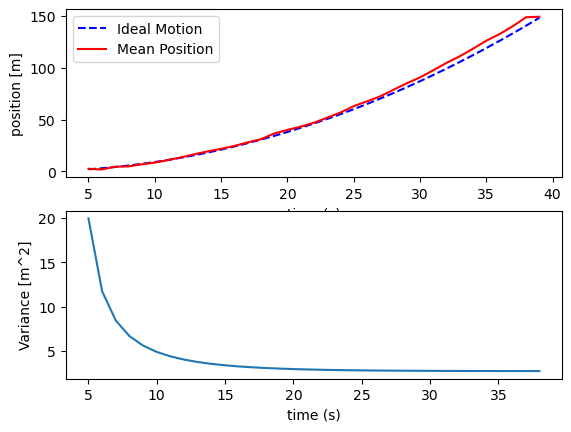

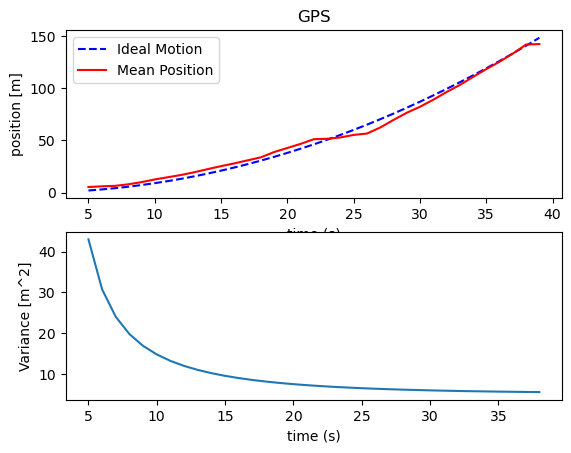

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

# Function for Measurement Update
def MeasureUpdate(mu1, var1, mu2, var2):
    ''' This function takes 2 means and 2 variance parameters
        and returns measurement update parameters.'''
    new_mu = (mu1*var2 + mu2*var1) / (var1 + var2)
    new_var = 1 / ((1 / var1) + (1 / var2))
    return [new_mu, new_var]
   
# Function for Prediction/Motion Update   
def PredictUpdate(mu1, var1, mu2, var2):
    ''' This function takes 2 means and 2 variance parameters
        and returns prediction update parameters.'''
    new_mu = mu1 + mu2
    new_var = var1 + var2
    return [new_mu, new_var]

t = np.arange(5,40,1)
IdealMotion = 0.1*((t**2)-t)
measurement_var = 5.2**2 #(r^2)
motion_var = 0.5**2 #(sigma^2)

measurement_mu = IdealMotion + np.random.normal(0,m.sqrt(measurement_var),len(t))
motion_mu = np.diff(IdealMotion) + np.random.normal(0,m.sqrt(motion_var),len(t)-1)

mu,var = 4.1, 8.5**2 # initial mean and variance
mu_list=[]
var_list=[]
Predict = True
x = np.arange(-10,160,0.1)

for n in range(len(t)):
    if n == (len(t)-1):
        Predict = False
    mu, var = MeasureUpdate(mu, var, measurement_mu[n], measurement_var)
    if Predict == True:
        mu, var = PredictUpdate(mu, var, motion_mu[n], motion_var)
    mu_list.append(mu)
    var_list.append(var)
    ProbDist = np.exp(-np.square(x-mu)/(2*var))/(np.sqrt(2*np.pi*var))
    
plt.show()
mu_list = np.array(mu_list)
var_list = np.array(var_list)

plt.subplot(211), plt.plot(t,IdealMotion,'b--'), plt.plot(t,mu_list,'r-'), plt.ylabel('position [m]'), plt.xlabel('time (s)'), plt.legend(('Ideal Motion','Mean Position'))
plt.subplot(212), plt.plot(t[:-1],var_list[:-1]), plt.ylabel('Variance [m^2]'), plt.xlabel('time (s)')
plt.show()

#GPS
measurement_var = 3.2**2 # measurement (r)
measurement_mu = IdealMotion + np.random.normal(0,np.sqrt(measurement_var),len(t))
measurement_mu[18:22]=0
mu,var = 4.1, 8.5**2 # initial mean and variance
mu_list=[]
var_list=[]
Predict = True
x = np.arange(-5,160,0.1)
for n in range(len(t)):
    if n == (len(t)-1):
        Predict = False
    mu, var = MeasureUpdate(mu, var, measurement_mu[n], measurement_var**2)
    if Predict == True:
        mu, var = PredictUpdate(mu, var, motion_mu[n], motion_var)
    mu_list.append(mu)
    var_list.append(var)
    ProbDist = np.exp(-np.square(x-mu)/(2*var))/(np.sqrt(2*np.pi*var))

plt.show()
mu_list = np.array(mu_list)
var_list = np.array(var_list)

plt.subplot(211), plt.title('GPS'),  plt.plot(t,IdealMotion,'b--'), plt.plot(t,mu_list,'r-'), plt.ylabel('position [m]'), plt.xlabel('time (s)'), plt.legend(('Ideal Motion','Mean Position'))
plt.subplot(212), plt.plot(t[:-1],var_list[:-1]), plt.ylabel('Variance [m^2]'), plt.xlabel('time (s)')
plt.show()